In [1]:
import pandas as pd
import numpy as np

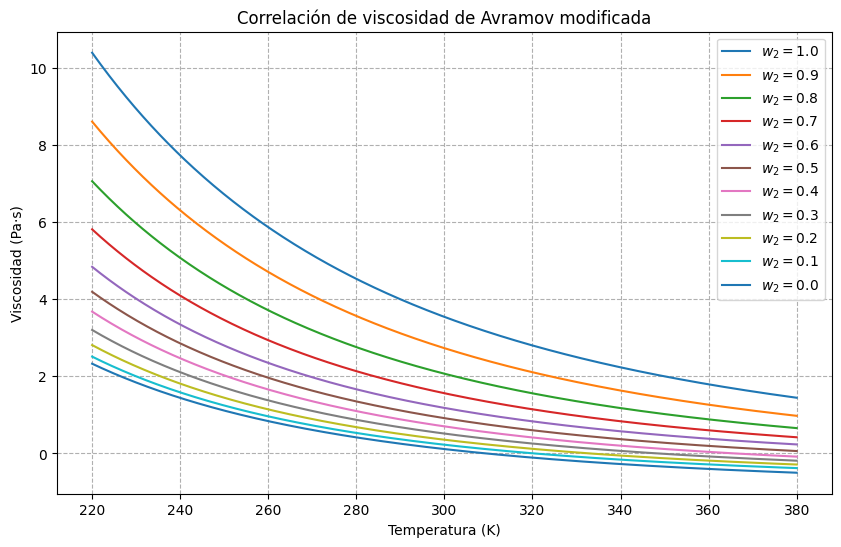

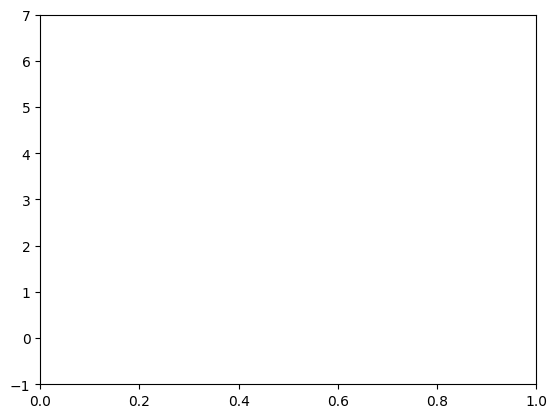

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def avramov_viscosity(T, eta0, Tg, alpha):
    """
    Calcula la viscosidad según la ecuación de Avramov modificada.
    
    Parámetros:
    - T: temperatura (K), puede ser escalar o array
    - eta0: viscosidad preexponencial (Pa.s)
    - Tg: temperatura de transición vítrea (K)
    - alpha: parámetro de ajuste

    Retorna:
    - eta: viscosidad (Pa.s)
    """
    return eta0 * np.exp((28.75 - np.log(eta0)) * (Tg / T)**alpha)

def plot_avramov(w2_values, Tg_values, ln_eta0_values, alpha_values):
    T = np.linspace(220, 380, 500)  # Rango de temperaturas en Kelvin

    plt.figure(figsize=(10, 6))

    for w2, Tg, ln_eta0, alpha in zip(w2_values, Tg_values, ln_eta0_values, alpha_values):
        eta0 = np.exp(ln_eta0) * 1e-3  # Convertir de mPa·s a Pa·s
        eta = avramov_viscosity(T, eta0, Tg, alpha) * 1e3
        # plt.semilogy(T, eta, label=f'$w_2={w2}$')
        plt.plot(T, np.log10(eta), label=f'$w_2={w2}$')

    # plt.axhline(10**12.5, color='gray', linestyle='--', label=r'$\eta_g = 10^{12.5}$ Pa·s')
    plt.xlabel('Temperatura (K)')
    plt.ylabel('Viscosidad (Pa·s)')
    plt.title('Correlación de viscosidad de Avramov modificada')
    plt.legend()
    plt.grid(True, which='both', ls='--')
    # plt.tight_layout()
    plt.show()
    plt.ylim(-1,7)

# Datos extraídos de la tabla
w2_values = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
Tg_values = [195.4, 186.0, 177.9, 171.0, 165.1, 160.0, 155.4, 151.4, 147.7, 144.3, 141.0]
ln_eta0_values = [-0.809, -1.082, -0.955, -0.890, -0.923, -1.183, -1.432, -1.535, -1.669, -1.843, -2.194]
alpha_values = [3.273, 3.361, 3.554, 3.732, 3.863, 3.843, 3.799, 3.824, 3.822, 3.777, 3.623]

# Graficar
plot_avramov(w2_values, Tg_values, ln_eta0_values, alpha_values)


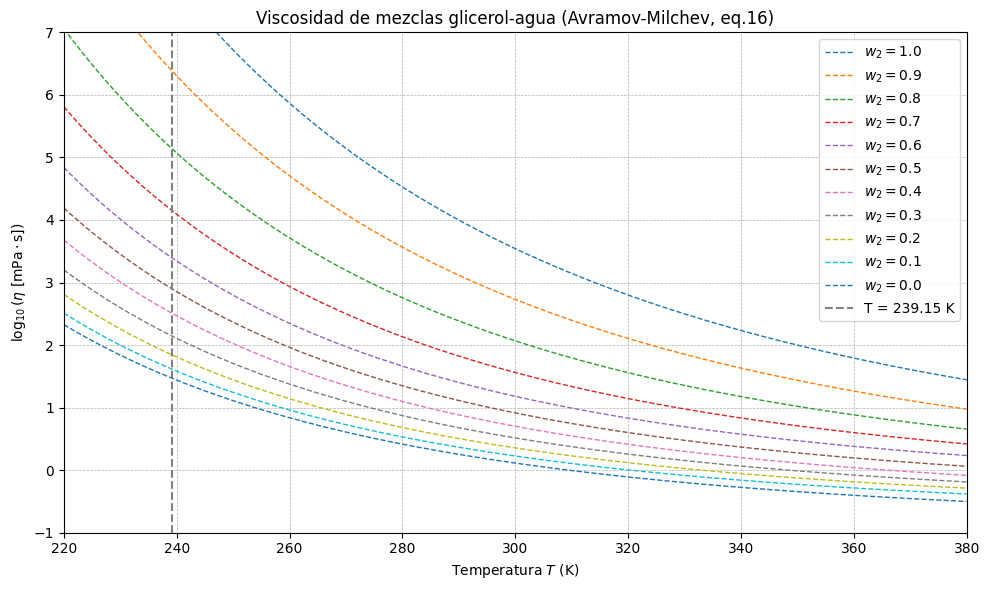

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Parámetros de Tabla 2 (Avramov‑Milchev eq.16) -----
w2_values   = [1.0,   0.9,   0.8,   0.7,   0.6,   0.5,   0.4,   0.3,   0.2,   0.1,   0.0]
Tg_values   = [195.4, 186.0, 177.9, 171.0, 165.1, 160.0, 155.4, 151.4, 147.7, 144.3, 141.0]
ln_eta0_tab = [-0.809, -1.082, -0.955, -0.890, -0.923, -1.183, -1.432, -1.535, -1.669, -1.843, -2.194]
R_tab       = [ 3.273,  3.361,  3.554,  3.732,  3.863,  3.843,  3.799,  3.824,  3.822,  3.777,  3.623]

# Rango de temperaturas (220 K a 380 K)
T = np.linspace(220, 380, 500)

plt.figure(figsize=(10, 6))

# Graficar cada curva con parámetros de la tabla
for w2, Tg, ln0, R in zip(w2_values, Tg_values, ln_eta0_tab, R_tab):
    eta0 = np.exp(ln0) * 1e-3  # de mPa·s a Pa·s
    eta  = eta0 * np.exp((28.75 - np.log(eta0)) * (Tg / T)**R)
    # convertir a log10(mPa·s):
    log10_eta_mPa = np.log10(eta) + 3
    plt.plot(T, log10_eta_mPa, linestyle='--', linewidth=1, label=f'$w_2={w2:.1f}$')

# Línea vertical en el límite de datos experimentales (239.15 K)
plt.axvline(239.15, color='gray', linestyle='--', label='T = 239.15 K')

# Etiquetas y estilo de ejes
plt.xlim(220, 380)
plt.ylim(-1, 7)
plt.yticks(np.arange(-1, 8, 1))
plt.xlabel('Temperatura $T$ (K)')
plt.ylabel(r'$\log_{10}(\eta\ [\mathrm{mPa}\cdot\mathrm{s}])$')
plt.title('Viscosidad de mezclas glicerol-agua (Avramov-Milchev, eq.16)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [25]:
import numpy as np

def eta(w2, T_C):
    """
    Viscosidad de mezcla glicerol-agua según Avramov-Milchev (eq.16).
    
    Parámetros
    ----------
    w2 : float
        Fracción másica de glicerol (desde 0.0 hasta 1.0).
    T_C : float
        Temperatura en grados Celsius.
    
    Retorna
    -------
    eta_mPa_s : float
        Viscosidad dinámica en mPa·s.
    """
    # 1) Convertir temperatura a Kelvin
    T = T_C + 273.15

    # 2) Ecuación polinómica para Tg(w2) (ec. 19)
    Tg = 140.3 + 35.272*w2 - 3.879*w2**2 + 23.467*w2**3

    # 3) Ajuste cuadrático para ln(eta0/mPa·s) (ec. 22)
    ln_eta0 = 2.1686 - 2.7096*w2 + 1.4449*w2**2

    # 4) Ajuste cuadrático para R (ec. 23)
    R = 3.6344 + 1.2198*w2 - 1.6142*w2**2

    # 5) Calcular eta0 en Pa·s
    eta0 = np.exp(ln_eta0) * 1e-3  # convierte mPa·s → Pa·s

    # 6) Ec. 16 de Avramov-Milchev
    eta_Pa_s = eta0 * np.exp((28.75 - np.log(eta0)) * (Tg / T)**R)

    # 7) Devolver en mPa·s
    eta_mPa_s = eta_Pa_s * 1e3
    return eta_mPa_s


In [29]:
for w2 in [0.0, 0.2, 1.0]:
    for T_C in [0, 20, 60]:
        print(f"w2={w2:.1f}, T={T_C:2d}°C → η = {eta(w2, T_C)*1e3:.2f} mPa·s")


w2=0.0, T= 0°C → η = 171128.67 mPa·s
w2=0.0, T=20°C → η = 87258.18 mPa·s
w2=0.0, T=60°C → η = 37101.91 mPa·s
w2=0.2, T= 0°C → η = 136308.23 mPa·s
w2=0.2, T=20°C → η = 63546.68 mPa·s
w2=0.2, T=60°C → η = 24515.68 mPa·s
w2=1.0, T= 0°C → η = 295667383.78 mPa·s
w2=1.0, T=20°C → η = 27016985.14 mPa·s
w2=1.0, T=60°C → η = 1151498.66 mPa·s


Ejemplo: w2=0.5, T=20°C → η = 11.159599073859813 mPa·s


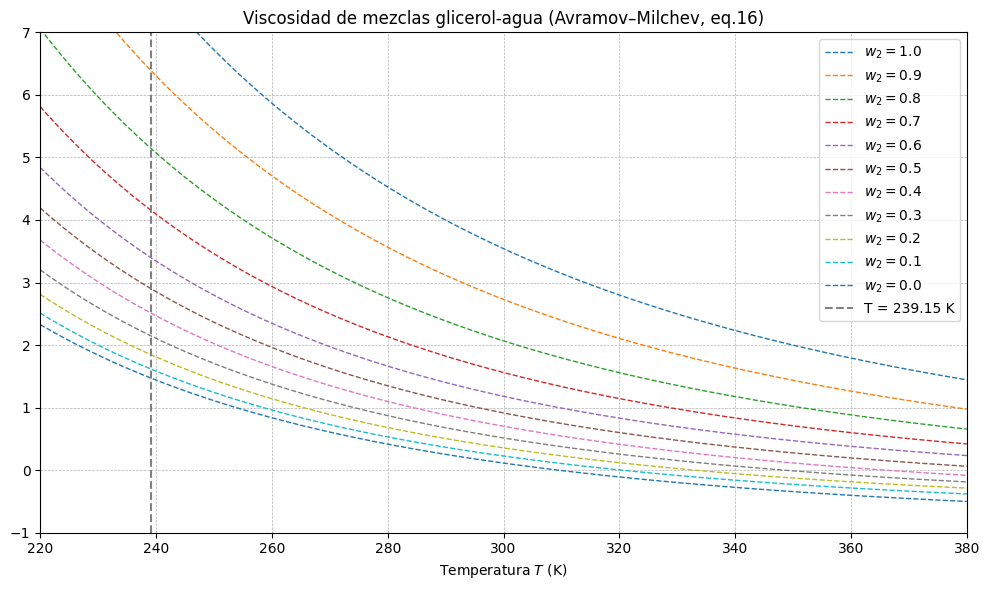

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de Tabla 2 (Avramov–Milchev, eq.16)
w2_values   = [1.0,   0.9,   0.8,   0.7,   0.6,   0.5,   0.4,   0.3,   0.2,   0.1,   0.0]
Tg_tab      = [195.4, 186.0, 177.9, 171.0, 165.1, 160.0, 155.4, 151.4, 147.7, 144.3, 141.0]
ln_eta0_tab = [-0.809, -1.082, -0.955, -0.890, -0.923, -1.183, -1.432, -1.535, -1.669, -1.843, -2.194]
alpha_tab   = [ 3.273,  3.361,  3.554,  3.732,  3.863,  3.843,  3.799,  3.824,  3.822,  3.777,  3.623]

def eta_mPa(w2, T_C):
    """
    Calcula la viscosidad en mPa·s para un w2 y temperatura en °C,
    usando directamente los parámetros de Tabla 2.
    """
    try:
        idx = w2_values.index(w2)
    except ValueError:
        raise ValueError(f"w2 debe ser uno de {w2_values}")
    Tg  = Tg_tab[idx]
    ln0 = ln_eta0_tab[idx]
    a   = alpha_tab[idx]
    
    T = T_C + 273.15  # Convertir a Kelvin
    eta0 = np.exp(ln0) * 1e-3  # de mPa·s a Pa·s
    eta  = eta0 * np.exp((28.75 - np.log(eta0)) * (Tg / T)**a)
    return eta * 1e3  # de Pa·s a mPa·s

# Verificación puntual
print("Ejemplo: w2=0.5, T=20°C → η =", eta_mPa(0.5, 20), "mPa·s")

# Graficar Figura 8
T = np.linspace(220, 380, 800)
plt.figure(figsize=(10, 6))

for w2 in w2_values:
    log_eta = np.log10([eta_mPa(w2, T_C) for T_C in T - 273.15])
    plt.plot(T, log_eta, linestyle='--', linewidth=1, label=f'$w_2={w2:.1f}$')

plt.axvline(239.15, color='gray', linestyle='--', label='T = 239.15 K')
plt.xlim(220, 380)
plt.ylim(-1, 7)
plt.yticks(np.arange(-1, 8, 1))
plt.xlabel('Temperatura $T$ (K)')
# plt.ylabel(r'$\log_{10}\bigl(\eta\ [\mathrm{mPa}\cdot\mathrm{s}]\bigr)$')
plt.title('Viscosidad de mezclas glicerol-agua (Avramov–Milchev, eq.16)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Fragilidad m estimada para glicerol: 50.2


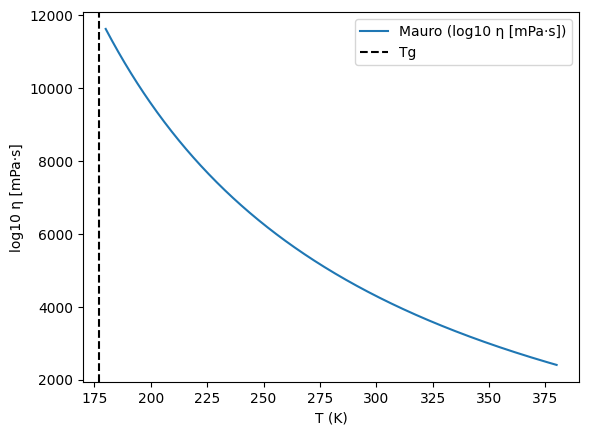

In [32]:
import numpy as np

def eta_mauro(T, eta0, Tg, m):
    """
    Ecuación 18 (Mauro et al.) para viscosidad dinámica.
    
    Parámetros
    ----------
    T    : array_like de float
           Temperatura en Kelvin.
    eta0 : float
           Prefactor (Pa·s).
    Tg   : float
           Temperatura de transición vítrea (K).
    m    : float
           Fragilidad (pendiente de log10(eta) vs Tg/T en T=Tg).
    
    Retorna
    -------
    eta  : array_like de float
           Viscosidad en Pa·s.
    """
    # Parámetro auxiliar
    pre = 27.6 - np.log(eta0)
    x = Tg / T
    exponent = pre * x * np.exp((m/pre - 1)*(x - 1))
    return eta0 * np.exp(exponent)

def estimate_fragility(eta_func, Tg, eps=1e-3):
    """
    Estima m = d log10(eta) / d (Tg/T) en T=Tg por diferencia finita.
    
    Parámetros
    ----------
    eta_func : callable
        Función que recibe T (K) y devuelve eta(T) en Pa·s.
    Tg        : float
        Temperatura de transición vítrea (K).
    eps       : float
        Pequeño desplazamiento en Kelvin para el cálculo numérico.
    
    Retorna
    -------
    m_est : float
        Fragilidad estimada.
    """
    # Dos puntos cercanos a Tg
    dT = eps
    T1, T2 = Tg - dT, Tg + dT
    x1, x2 = Tg/T1, Tg/T2
    logeta1 = np.log10(eta_func(T1))
    logeta2 = np.log10(eta_func(T2))
    # derivada
    return (logeta2 - logeta1) / (x2 - x1)

# --- Ejemplo de uso para glicerol puro ---
# Parámetros de Mauro et al. para glicerol puro:
eta0_glic = 6.3e-4     # Pa·s (convertido de 6.3e-4 Pa·s)
Tg_glic   = 177.0      # K (según Avramov ajustado, o según Mauro usarías ~193 K)
# Estimamos m a partir de Avramov (o datos experimentales):
def eta_avramov_pure(T):
    # usando eq 16 con eta0=6.3e-4, R=3.2, Tg=177
    return eta0_glic * np.exp((28.75 - np.log(eta0_glic)) * (Tg_glic / T)**3.2)

m_glic = estimate_fragility(eta_avramov_pure, Tg_glic)
print(f"Fragilidad m estimada para glicerol: {m_glic:.1f}")

# Ahora podemos graficar o evaluar eta_mauro
import matplotlib.pyplot as plt

T = np.linspace(180, 380, 500)
eta_m = eta_mauro(T, eta0_glic, Tg_glic, m_glic)

plt.plot(T, np.log10(eta_m)*1000, label='Mauro (log10 η [mPa·s])')
plt.axvline(Tg_glic, color='k', ls='--', label='Tg')
plt.xlabel('T (K)')
plt.ylabel('log10 η [mPa·s]')
plt.legend()
plt.show()


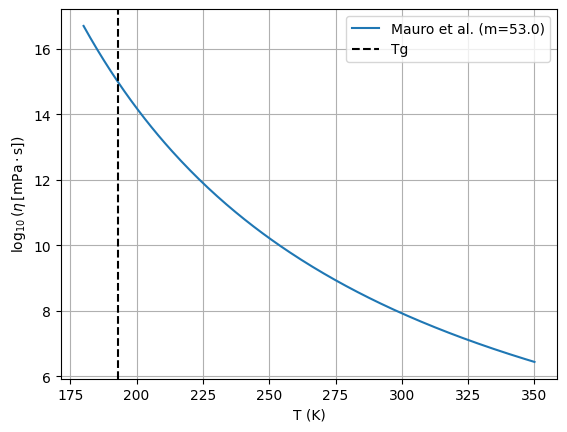

In [33]:
import numpy as np

def eta_mauro(T, eta0, Tg, m):
    """
    Ecuación 18 (Mauro et al.) para viscosidad dinámica.
    Parámetros:
      T    : float o array, temperatura en Kelvin
      eta0 : float, prefactor en Pa·s
      Tg   : float, temperatura de transición vítrea en K
      m    : float, fragilidad (derivada analítica en x=1)
    Retorna:
      eta  : float o array, viscosidad en Pa·s
    """
    # Definimos x = Tg/T
    x = Tg / T
    A = 27.6 - np.log(eta0)
    B = m / A - 1
    exponent = A * x * np.exp(B*(x - 1))
    return eta0 * np.exp(exponent)

# --- Ejemplo de uso para glicerol puro ---
eta0_glic = 6.3e-4   # Pa·s
Tg_glic   = 193.0    # K, temperatura vítrea experimental
m_glic    = 53.0     # ej. fragilidad típica de glicerol (~53)

# Evaluamos en un rango de T
T = np.linspace(180, 350, 200)
eta = eta_mauro(T, eta0_glic, Tg_glic, m_glic)  # Pa·s

# Convertir a mPa·s para graficar log10
eta_mPa_s = eta * 1e3  
log10_eta = np.log10(eta_mPa_s)

# Graficar
import matplotlib.pyplot as plt
plt.plot(T, log10_eta, label=f'Mauro et al. (m={m_glic})')
plt.axvline(Tg_glic, color='k', ls='--', label='Tg')
plt.xlabel('T (K)')
plt.ylabel(r'$\log_{10}(\eta\,\mathrm{[mPa\cdot s]})$')
plt.legend()
plt.grid(True)
plt.show()
